# ERA - Interim

## Configuration

In [1]:
INPUT_FILE = 'csvs/database_interim.csv'
HOPT_ELM_EXP = 'interim_elm_1l_cv'
HOPT_SVM_EXP = 'interim_svm_cv'

In [2]:
from lib.helpers import *
from lib.plots import *
from IPython.display import set_matplotlib_formats
from IPython.core.display import clear_output

%matplotlib inline
%load_ext autoreload
%autoreload 2
set_matplotlib_formats('retina', 'png', 'pdf')

## Read data

In [3]:
import pandas as pd

df = pd.read_csv(INPUT_FILE, na_values=['#NAME?'])

In [4]:
len(df)

22674

In [5]:
df.head(5)

,timestamp,power,850_geopotential,850_temperature,850_u_component_of_wind,850_v_component_of_wind,850_potential_vorticity,850_specific_humidity,850_vertical_velocity,850_vorticity_(relative),...,soil_temperature_level_3,low_cloud_cover,medium_cloud_cover,high_cloud_cover,skin_reservoir_content,total_column_ozone,logarithm_of_surface_roughness_length_for_heat,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer
0,817102800.0,17.368866,15551.239746,278.822571,-3.061764,-0.489191,2.326271e-07,0.003270,0.073979,-0.000011,...,287.882782,0.161972,0.0,9.999779e-13,1.062396e-05,0.005594,-6.338408,278.132759,291.093918,279.080872
1,817124400.0,0.000000,15506.351440,278.655956,-1.135327,-0.203951,2.958344e-07,0.003151,0.009349,-0.000019,...,287.755463,0.000000,0.0,2.318631e-01,1.441880e-06,0.005579,-6.338408,288.425827,291.072754,282.956604
2,817146000.0,0.000000,15337.826416,278.584427,2.881071,-0.913684,4.412832e-07,0.003208,0.007616,-0.000022,...,287.671432,0.000000,0.0,5.135536e-03,1.301901e-07,0.005531,-6.338408,279.269562,291.051453,283.563354
3,817167600.0,1.750994,15132.988037,279.425201,3.217056,1.645609,5.794467e-07,0.002802,-0.050313,-0.000028,...,287.575409,0.000000,0.0,9.999779e-13,5.696230e-06,0.005595,-6.338408,275.771721,291.030487,280.208923
4,817189200.0,13.754562,14825.130859,277.739731,7.494438,3.847301,7.328358e-07,0.003161,-0.113207,-0.000030,...,287.427979,0.276297,0.0,3.753959e-02,3.102752e-05,0.005554,-6.338408,275.348373,291.009308,277.562195


### Date conversion

In [6]:
def to_datetime(row):
    row = pd.to_datetime(row, unit='s')
    row = row.dt.tz_localize('UTC').dt.tz_convert('Europe/Brussels')
    row = row.apply(lambda x: x.strftime('%d/%m/%Y %H:%M:%S'))
    
    return row

df['timestamp'] = to_datetime(df['timestamp'])

In [7]:
df.head(5)

,timestamp,power,850_geopotential,850_temperature,850_u_component_of_wind,850_v_component_of_wind,850_potential_vorticity,850_specific_humidity,850_vertical_velocity,850_vorticity_(relative),...,soil_temperature_level_3,low_cloud_cover,medium_cloud_cover,high_cloud_cover,skin_reservoir_content,total_column_ozone,logarithm_of_surface_roughness_length_for_heat,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer
0,23/11/1995 06:00:00,17.368866,15551.239746,278.822571,-3.061764,-0.489191,2.326271e-07,0.003270,0.073979,-0.000011,...,287.882782,0.161972,0.0,9.999779e-13,1.062396e-05,0.005594,-6.338408,278.132759,291.093918,279.080872
1,23/11/1995 12:00:00,0.000000,15506.351440,278.655956,-1.135327,-0.203951,2.958344e-07,0.003151,0.009349,-0.000019,...,287.755463,0.000000,0.0,2.318631e-01,1.441880e-06,0.005579,-6.338408,288.425827,291.072754,282.956604
2,23/11/1995 18:00:00,0.000000,15337.826416,278.584427,2.881071,-0.913684,4.412832e-07,0.003208,0.007616,-0.000022,...,287.671432,0.000000,0.0,5.135536e-03,1.301901e-07,0.005531,-6.338408,279.269562,291.051453,283.563354
3,24/11/1995 00:00:00,1.750994,15132.988037,279.425201,3.217056,1.645609,5.794467e-07,0.002802,-0.050313,-0.000028,...,287.575409,0.000000,0.0,9.999779e-13,5.696230e-06,0.005595,-6.338408,275.771721,291.030487,280.208923
4,24/11/1995 06:00:00,13.754562,14825.130859,277.739731,7.494438,3.847301,7.328358e-07,0.003161,-0.113207,-0.000030,...,287.427979,0.276297,0.0,3.753959e-02,3.102752e-05,0.005554,-6.338408,275.348373,291.009308,277.562195


## Data Distribution

### Distribution of features

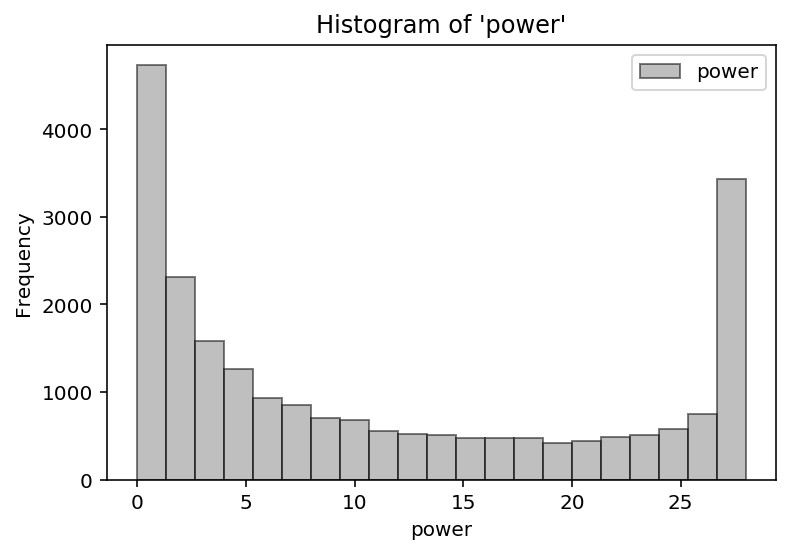

In [8]:
plot_histogram(df['power'])

## Data Preparation

In [9]:
y = df.power
X = df.drop(['timestamp', 'power'], 1)

In [10]:
y.head(5)

0    17.368866
1     0.000000
2     0.000000
3     1.750994
4    13.754562
Name: power, dtype: float64

In [11]:
X.head(5)

,850_geopotential,850_temperature,850_u_component_of_wind,850_v_component_of_wind,850_potential_vorticity,850_specific_humidity,850_vertical_velocity,850_vorticity_(relative),850_divergence,850_relative_humidity,...,soil_temperature_level_3,low_cloud_cover,medium_cloud_cover,high_cloud_cover,skin_reservoir_content,total_column_ozone,logarithm_of_surface_roughness_length_for_heat,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer
0,15551.239746,278.822571,-3.061764,-0.489191,2.326271e-07,0.003270,0.073979,-0.000011,-0.000020,48.717743,...,287.882782,0.161972,0.0,9.999779e-13,1.062396e-05,0.005594,-6.338408,278.132759,291.093918,279.080872
1,15506.351440,278.655956,-1.135327,-0.203951,2.958344e-07,0.003151,0.009349,-0.000019,-0.000002,47.621414,...,287.755463,0.000000,0.0,2.318631e-01,1.441880e-06,0.005579,-6.338408,288.425827,291.072754,282.956604
2,15337.826416,278.584427,2.881071,-0.913684,4.412832e-07,0.003208,0.007616,-0.000022,0.000012,48.086472,...,287.671432,0.000000,0.0,5.135536e-03,1.301901e-07,0.005531,-6.338408,279.269562,291.051453,283.563354
3,15132.988037,279.425201,3.217056,1.645609,5.794467e-07,0.002802,-0.050313,-0.000028,0.000006,41.131454,...,287.575409,0.000000,0.0,9.999779e-13,5.696230e-06,0.005595,-6.338408,275.771721,291.030487,280.208923
4,14825.130859,277.739731,7.494438,3.847301,7.328358e-07,0.003161,-0.113207,-0.000030,0.000008,52.422501,...,287.427979,0.276297,0.0,3.753959e-02,3.102752e-05,0.005554,-6.338408,275.348373,291.009308,277.562195


## Explore data

### Find outliers

In [12]:
outliers = [find_outliers_tukey(X[column]) for column in X]

pd.DataFrame(data=[[len(tukey_indices) for tukey_indices, tukey_values in outliers]], columns=X.columns)

,850_geopotential,850_temperature,850_u_component_of_wind,850_v_component_of_wind,850_potential_vorticity,850_specific_humidity,850_vertical_velocity,850_vorticity_(relative),850_divergence,850_relative_humidity,...,soil_temperature_level_3,low_cloud_cover,medium_cloud_cover,high_cloud_cover,skin_reservoir_content,total_column_ozone,logarithm_of_surface_roughness_length_for_heat,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer
0,651,0,590,994,410,29,1429,456,546,0,...,0,3475,3153,2919,4246,521,0,514,0,28


## Feature Engineering

### Remove constant features

In [13]:
columns_removed = get_constants(X)
columns_removed

Index(['ice_temperature_layer_4',
       'logarithm_of_surface_roughness_length_for_heat', 'sea_ice_cover',
       'sea_surface_temperature', 'surface_roughness'],
      dtype='object')

In [14]:
X = X.drop(columns_removed, 1)

In [15]:
len(X.columns)

127

## Feature selection and model building

### Split processed data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False, random_state=0)

In [17]:
print('Train: {}'.format(X_train.shape))
print('Test: {}'.format(X_test.shape))

Train: (17005, 127)
Test: (5669, 127)


### Shuffle train data

In [18]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)

### Feature selection

In [19]:
from sklearn.feature_selection import mutual_info_regression

feature_scores = get_feature_values(X, y)
pd.Series(feature_scores, index=X.columns).sort_values(ascending=False).head(20)

875_v_component_of_wind                                   0.462927
850_v_component_of_wind                                   0.424622
900_v_component_of_wind                                   0.401553
925_v_component_of_wind                                   0.276251
vertical_integral_of_northward_water_vapour_flux          0.222517
10_metre_v_wind_component                                 0.188854
vertical_integral_of_northward_heat_flux                  0.119270
850_vertical_velocity                                     0.115909
vertical_integral_of_northward_mass_flux                  0.112397
875_vertical_velocity                                     0.111954
vertical_integral_of_northward_total_energy_flux          0.108425
900_vertical_velocity                                     0.099436
925_vertical_velocity                                     0.086518
vertical_integral_of_northward_cloud_liquid_water_flux    0.084984
vertical_integral_of_kinetic_energy                       0.07

In [20]:
len(feature_scores)

127

## Parameter exploration

In [21]:
from datetime import datetime
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics.scorer import make_scorer

cv = ShuffleSplit(n_splits=6)
scoring = {
    'ev': make_scorer(explained_variance_score),
    'r2': make_scorer(r2_score),
    'rmse': make_scorer(rmse_score, greater_is_better=False),
}
models = {}

### Find hyperparameters

In [22]:
from hyperopt.mongoexp import MongoTrials

#### ELM

In [23]:
trials = MongoTrials('mongo://localhost:27017/hyperopt/jobs', exp_key=HOPT_ELM_EXP)

display(len(trials.results))
display(pd.DataFrame(trials.results).sort_values(by='loss').head(5))

337

,loss,loss_ev,loss_r2,loss_variance,ridge__alpha,rl__alpha,rl__n_hidden,rl__rbf_width,selector__k,status,time
295,5.846518,0.685929,0.685797,0.012648,0.990079,0.497994,5207.0,0.001373,36.0,ok,102.090244
263,5.849694,0.685493,0.685436,0.017022,0.438031,0.718031,2438.0,0.001510,29.0,ok,28.584992
259,5.851310,0.685371,0.685294,0.011548,0.666374,0.674055,2347.0,0.004542,26.0,ok,27.632780
297,5.855667,0.684840,0.684767,0.020320,0.980674,0.482752,8668.0,0.001490,42.0,ok,248.597517
150,5.858518,0.684609,0.684531,0.008972,0.468039,0.515967,6361.0,0.007451,38.0,ok,260.121099


In [24]:
best = get_best_trial(trials.results)
display(pd.DataFrame([best]))
models['elm'] = build_elm(
    X, y, 
    selector__k=int(best['selector__k']),
    rl__n_hidden=int(best['rl__n_hidden']),
    rl__alpha=best['rl__alpha'],
    rl__rbf_width=best['rl__rbf_width'],
    ridge__alpha=best['ridge__alpha'],
)

,loss,loss_ev,loss_r2,loss_variance,ridge__alpha,rl__alpha,rl__n_hidden,rl__rbf_width,selector__k,status,time
259,5.85131,0.685371,0.685294,0.011548,0.666374,0.674055,2347.0,0.004542,26.0,ok,27.63278


#### SVM

In [25]:
trials = MongoTrials('mongo://localhost:27017/hyperopt/jobs', exp_key=HOPT_SVM_EXP)

display(len(trials.results))
display(pd.DataFrame(trials.results).sort_values(by='loss').head(5))

338

,loss,loss_ev,loss_r2,loss_variance,selector__k,status,svm__C,svm__epsilon,svm__gamma,time
296,5.754913,0.697090,0.695498,0.023358,69.0,ok,17.709791,0.006703,0.029595,299.560340
305,5.765787,0.696191,0.694298,0.030632,76.0,ok,15.310460,0.019215,0.022972,245.795763
258,5.768359,0.695664,0.694033,0.029567,76.0,ok,10.109826,0.003400,0.028228,246.580820
257,5.769791,0.695868,0.693849,0.034275,88.0,ok,21.234498,0.010250,0.019641,328.748332
290,5.770085,0.695473,0.693857,0.028745,81.0,ok,17.064695,0.013309,0.026277,285.484880


In [26]:
best = get_best_trial(trials.results)
display(pd.DataFrame([best]))
models['svm'] = build_svm(
    X, y,
    selector__k=int(best['selector__k']),
    svm__C=best['svm__C'],
    svm__epsilon=best['svm__epsilon'],
    svm__gamma=best['svm__gamma']
)

,loss,loss_ev,loss_r2,loss_variance,selector__k,status,svm__C,svm__epsilon,svm__gamma,time
305,5.765787,0.696191,0.694298,0.030632,76.0,ok,15.31046,0.019215,0.022972,245.795763


### Validation curve

In [27]:
from sklearn.model_selection import validation_curve

#### ELM

##### Number of features

In [28]:
param_range = pd.Series(np.linspace(5, len(feature_scores), num=16, dtype=int), name='# of features')

train_scores, test_scores = validation_curve(
    models['elm'], 
    X, 
    y, 
    param_name='selector__k', 
    param_range=param_range,
    cv=cv, 
    scoring='r2'
)

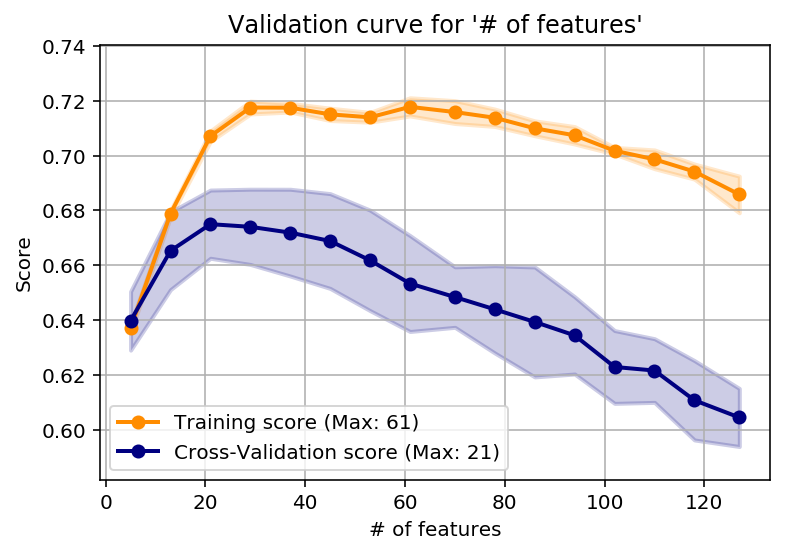

In [29]:
train_scores = pd.DataFrame(train_scores)
test_scores = pd.DataFrame(test_scores)

train_scores.name = 'Training score'
test_scores.name = 'Cross-Validation score'

plot_validation_curve(param_range, train_scores, test_scores)

##### Hidden neurons

In [30]:
param_range = pd.Series(np.geomspace(64, 8192, num=16, dtype=int), name='# of hidden neurons')

train_scores, test_scores = validation_curve(
    models['elm'], 
    X, 
    y, 
    param_name='rl__n_hidden', 
    param_range=param_range,
    cv=cv, 
    scoring='r2'
)

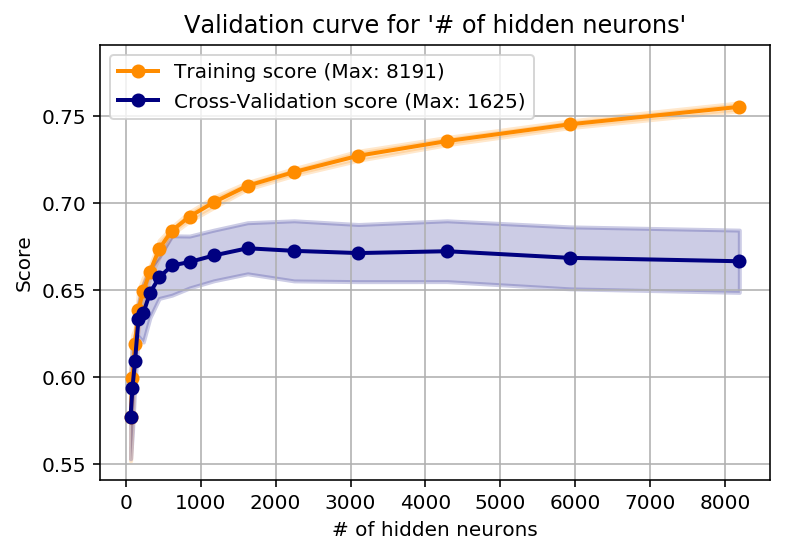

In [31]:
train_scores = pd.DataFrame(train_scores)
test_scores = pd.DataFrame(test_scores)

train_scores.name = 'Training score'
test_scores.name = 'Cross-Validation score'

plot_validation_curve(param_range, train_scores, test_scores)

#### SVM

##### Number of features

In [32]:
param_range = pd.Series(np.linspace(5, len(feature_scores), num=16, dtype=int), name='# of features')

train_scores, test_scores = validation_curve(
    models['svm'], 
    X, 
    y, 
    param_name='selector__k', 
    param_range=param_range,
    cv=cv, 
    scoring='r2'
)

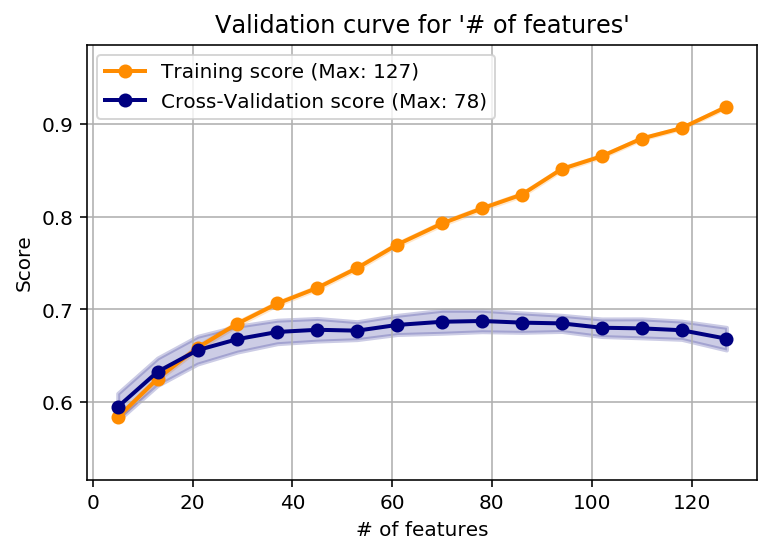

In [33]:
train_scores = pd.DataFrame(train_scores)
test_scores = pd.DataFrame(test_scores)

train_scores.name = 'Training score'
test_scores.name = 'Cross-Validation score'

plot_validation_curve(param_range, train_scores, test_scores)

##### C

In [34]:
param_range = pd.Series(np.geomspace(1e-4, 100, num=16), name='# of features')

train_scores, test_scores = validation_curve(
    models['svm'], 
    X, 
    y, 
    param_name='svm__C', 
    param_range=param_range,
    cv=cv, 
    scoring='r2'
)

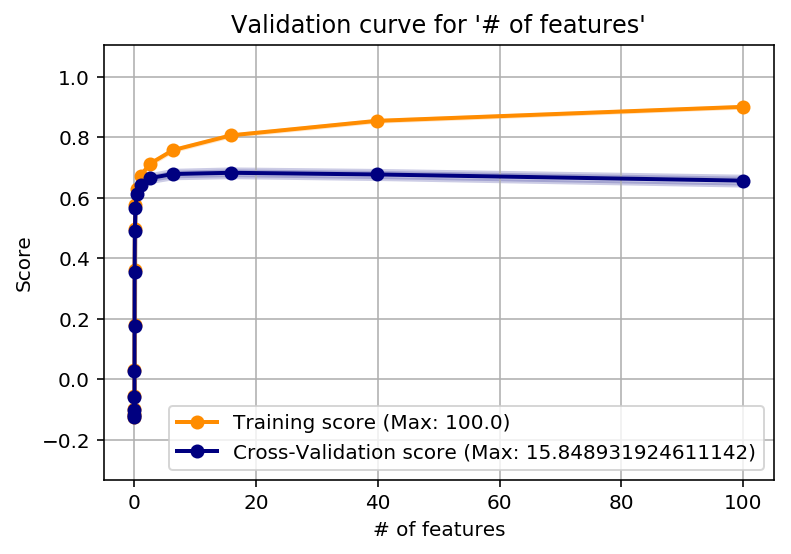

In [35]:
train_scores = pd.DataFrame(train_scores)
test_scores = pd.DataFrame(test_scores)

train_scores.name = 'Training score'
test_scores.name = 'Cross-Validation score'

plot_validation_curve(param_range, train_scores, test_scores)

### Learning curve

In [36]:
from sklearn.model_selection import learning_curve

#### ELM

In [37]:
train_sizes, train_scores, test_scores = learning_curve(
    models['elm'], 
    X, 
    y, 
    train_sizes=np.linspace(.1, 1.0, num=16),
    cv=cv,
    scoring='r2',
    shuffle=True
)

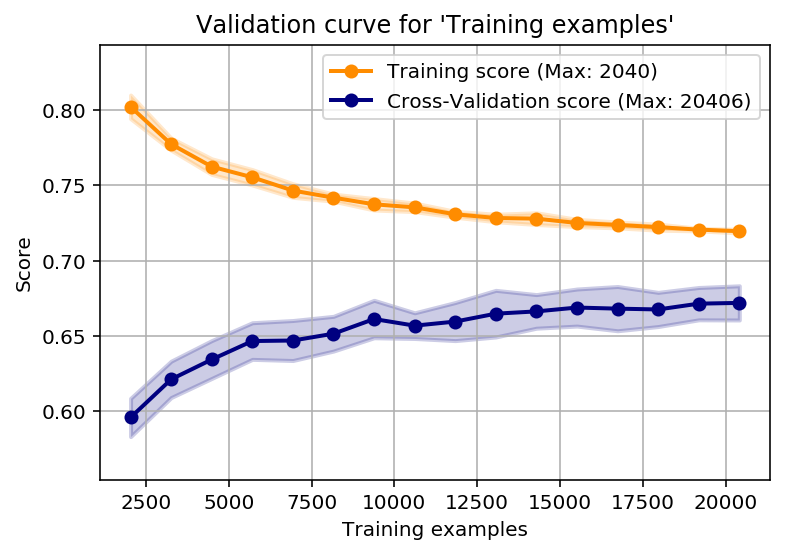

In [38]:
train_sizes = pd.Series(train_sizes, name='Training examples')
train_scores = pd.DataFrame(train_scores)
test_scores = pd.DataFrame(test_scores)

train_scores.name = 'Training score'
test_scores.name = 'Cross-Validation score'

plot_validation_curve(train_sizes, train_scores, test_scores)

#### SVM

In [39]:
train_sizes, train_scores, test_scores = learning_curve(
    models['svm'], 
    X, 
    y, 
    train_sizes=np.linspace(.1, 1.0, num=16),
    cv=cv,
    scoring='r2',
    shuffle=True
)

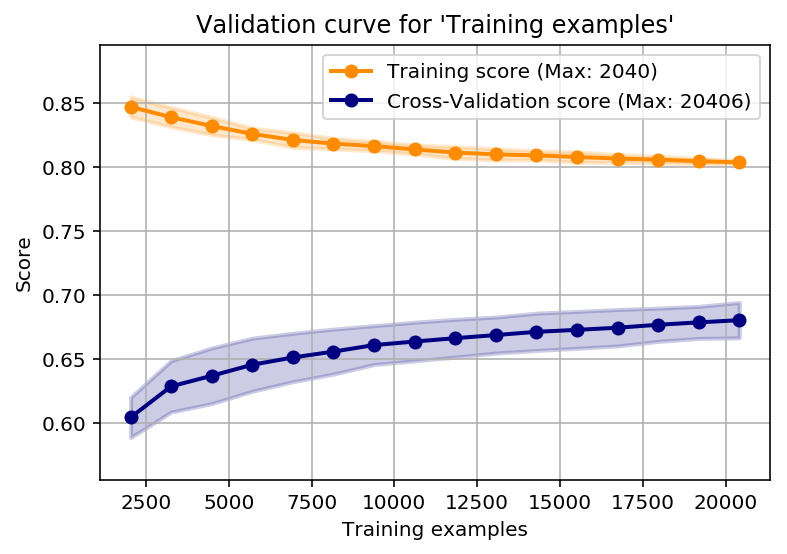

In [40]:
train_sizes = pd.Series(train_sizes, name='Training examples')
train_scores = pd.DataFrame(train_scores)
test_scores = pd.DataFrame(test_scores)

train_scores.name = 'Training score'
test_scores.name = 'Cross-Validation score'

plot_validation_curve(train_sizes, train_scores, test_scores)

## Validations

In [41]:
from sklearn.base import clone

### ELM

In [42]:
model = clone(models['elm'])
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test), index=y_test.index, name='{} prediction'.format(y_test.name))

get_scores([
    pd.Series([y_train, model.predict(X_train)], name='Training'),
    pd.Series([y_test, y_pred], name='Testing'),
])

,EV,R2,RMSE
Training,0.71939,0.719390,5.471221
Testing,0.67253,0.668671,5.987204


#### Histogram compare

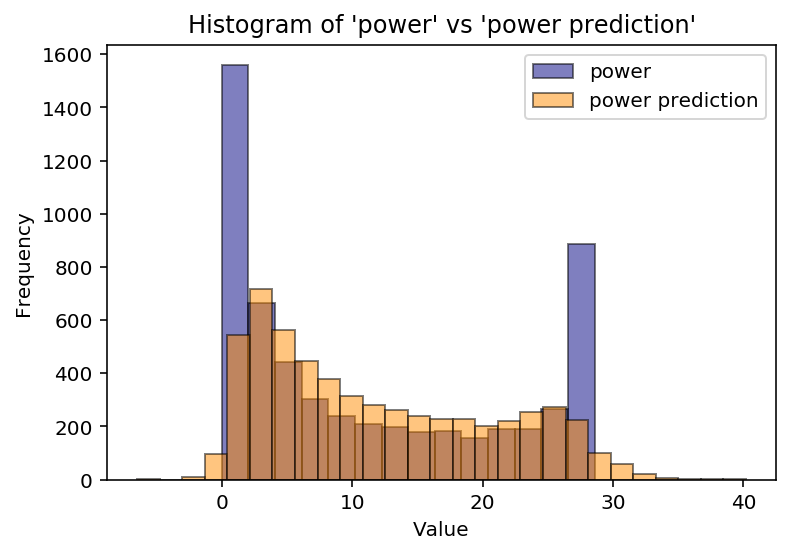

In [43]:
plot_histogram_compare(y_test, y_pred)

#### Scatter compare

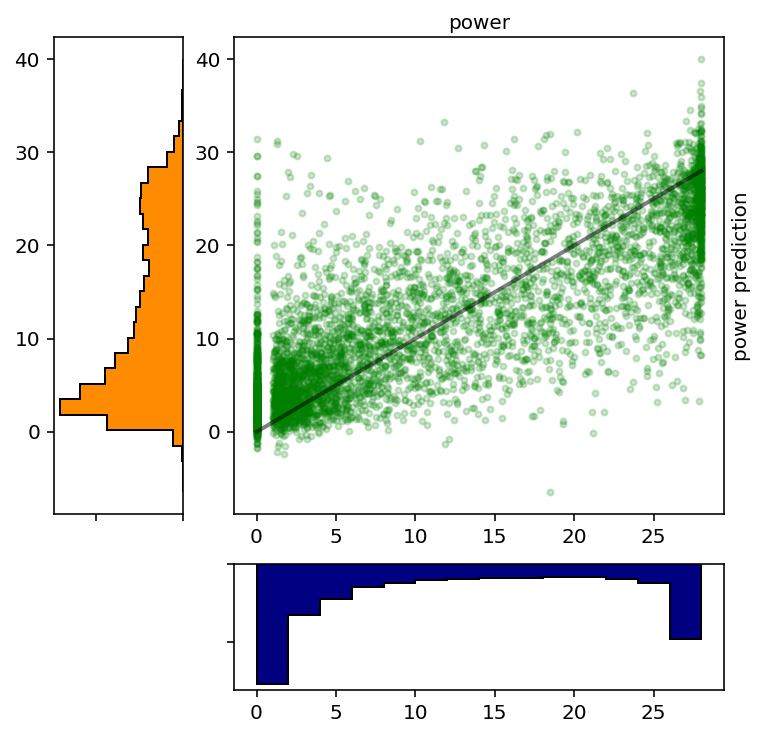

In [44]:
plot_scatter_histogram(y_test, y_pred)

#### Accuracy histogram

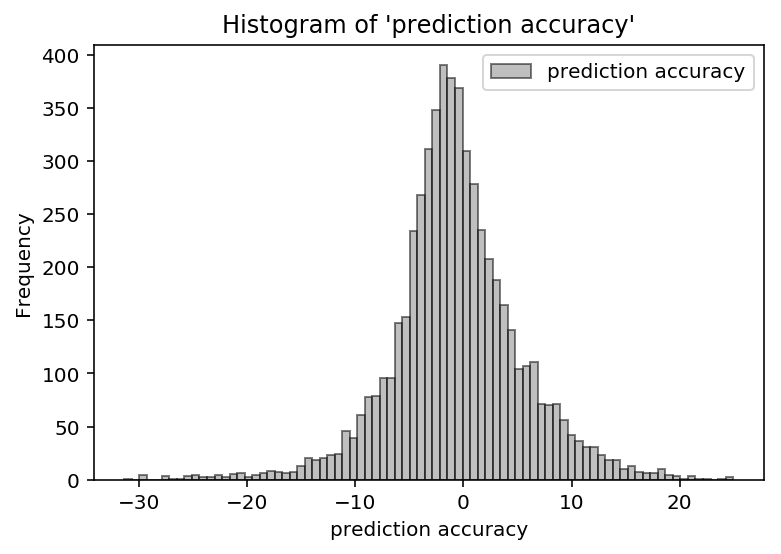

In [45]:
y_accuracy = pd.Series(y_test - y_pred, name='prediction accuracy')

plot_histogram(y_accuracy)

### SVM

In [46]:
model = clone(models['svm'])
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test), index=y_test.index, name='{} prediction'.format(y_test.name))

get_scores([
    pd.Series([y_train, model.predict(X_train)], name='Training'),
    pd.Series([y_test, y_pred], name='Testing'),
])

,EV,R2,RMSE
Training,0.805744,0.804400,4.567901
Testing,0.676635,0.676299,5.917881


#### Histogram compare

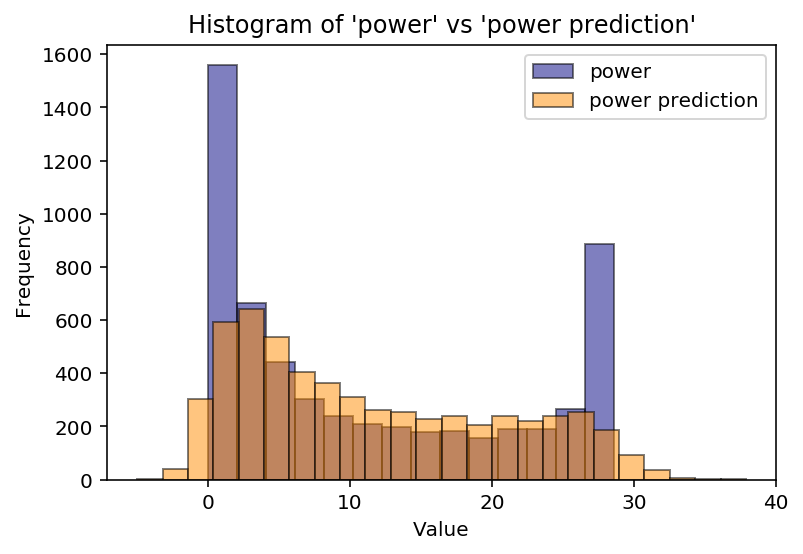

In [47]:
plot_histogram_compare(y_test, y_pred)

#### Scatter compare

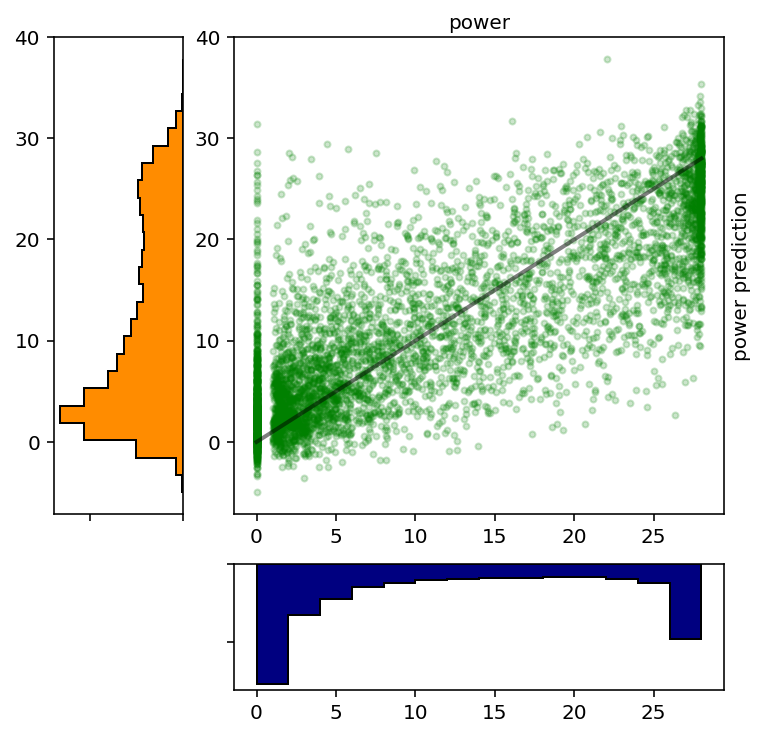

In [48]:
plot_scatter_histogram(y_test, y_pred)

#### Accuracy histogram

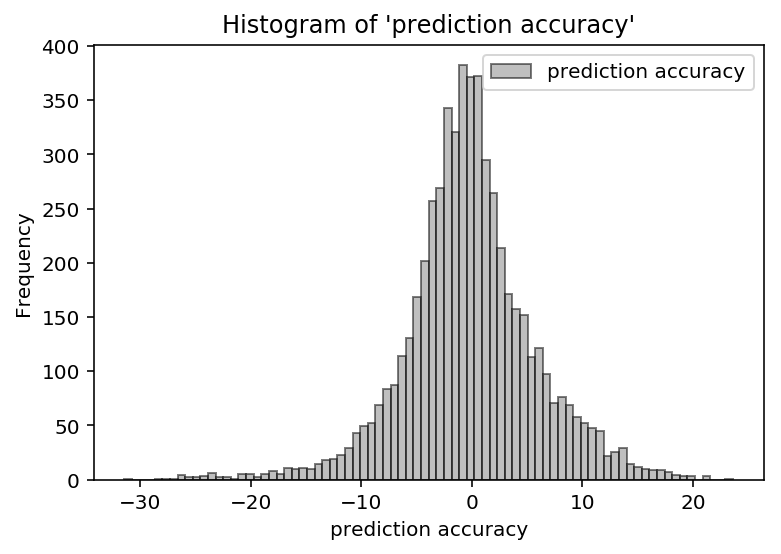

In [49]:
y_accuracy = pd.Series(y_test - y_pred, name='prediction accuracy')

plot_histogram(y_accuracy)